# Exploratory Data Analysis

> Deals with Exploratory data analysis And Preprocessing

In [ ]:
#| default_exp manual


[![](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1JwDxmTeTcpSFA_7BjMSJVrwMuWXLNCVn)

<!-- [![](https://www.google.com/images/branding/googlelogo/1x/googlelogo_color_92x30dp.png)](https://www.google.com) -->

[View Source Code](https://github.com/Hemanth-Thaluru/sdm_class_prj) | 
[View Slides](https://www.buffalo.edu/) | 
[Watch Video Walkthrough](https://www.buffalo.edu/) 

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
import seaborn as sns
from fastai.tabular.all import *

In [ ]:
#| hide
# from pathlib import Path
# import os
# compe='titanic'
# iskaggle= os.environ.get('KAGGLE_KERNEL_RUNTYPE','')
# if iskaggle:
#     path=Path(f'../input/{compe}')
#     ! pip install -Uqq fastai
# else:
#     import kaggle,zipfile
#     path=Path(f'{compe}')
#     if not path.exists():
#         kaggle.api.competition_download_cli(str(path))
#         zipfile.ZipFile(f'{path}.zip').extractall(path)

In [ ]:
#| hide
pd.options.display.float_format = '{:.2f}'.format


In [ ]:
set_seed(42)

# Description about the Dataset

>The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This is a very unforgetable disaster that no one in the world can forget.
It took about $7.5 million to build the Titanic and it sunk under the ocean due to collision. The Titanic Dataset is a very good dataset for begineers to start a journey in data science and participate in competitions in Kaggle.
The Objective of this notebook is to give an **idea how is the workflow in any predictive modeling problem**. 
How do we check features, how do we add new features and some Machine Learning Concepts.


# Preprocessing Data

In [ ]:
data=pd.read_csv('titanic/train.csv')
data.head(4)

In [ ]:
data.isnull().sum() #checking for total null values

The **Age, Cabin and Embarked** have null values. I will try to fix them.

# How many Survived ?

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(data=data,x='Survived',ax=ax[1])
ax[1].set_title('Survived')
plt.show()

It is evident that not many passengers survived the accident. 

Out of 891 passengers in training set, only around 350 survived i.e Only **38.4%** of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.

We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Port Of Embarcation, Age,etc.

First let us understand the different types of features.

# Types of features


> **Categorical Features**:
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as **Nominal Variables**.
Categorical Features in the dataset: Sex,Embarked.

>**Ordinal Features**:
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we can have a relative sort in the variable.
Ordinal Features in the dataset: PClass

>**Continous Feature**:
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.
Continous Features in the dataset: Age

## Sex--> Categorical Feature

In [ ]:
data.groupby(['Sex','Survived'])['Survived'].count()

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

This looks interesting. The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved. The survival rates for a **women on the ship is around 75% while that for men in around 18-19%.**

This looks to be a **very important** feature for modeling. But is it the best??   Lets check other features.

## Pclass --> Ordinal Feature

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower


In [ ]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

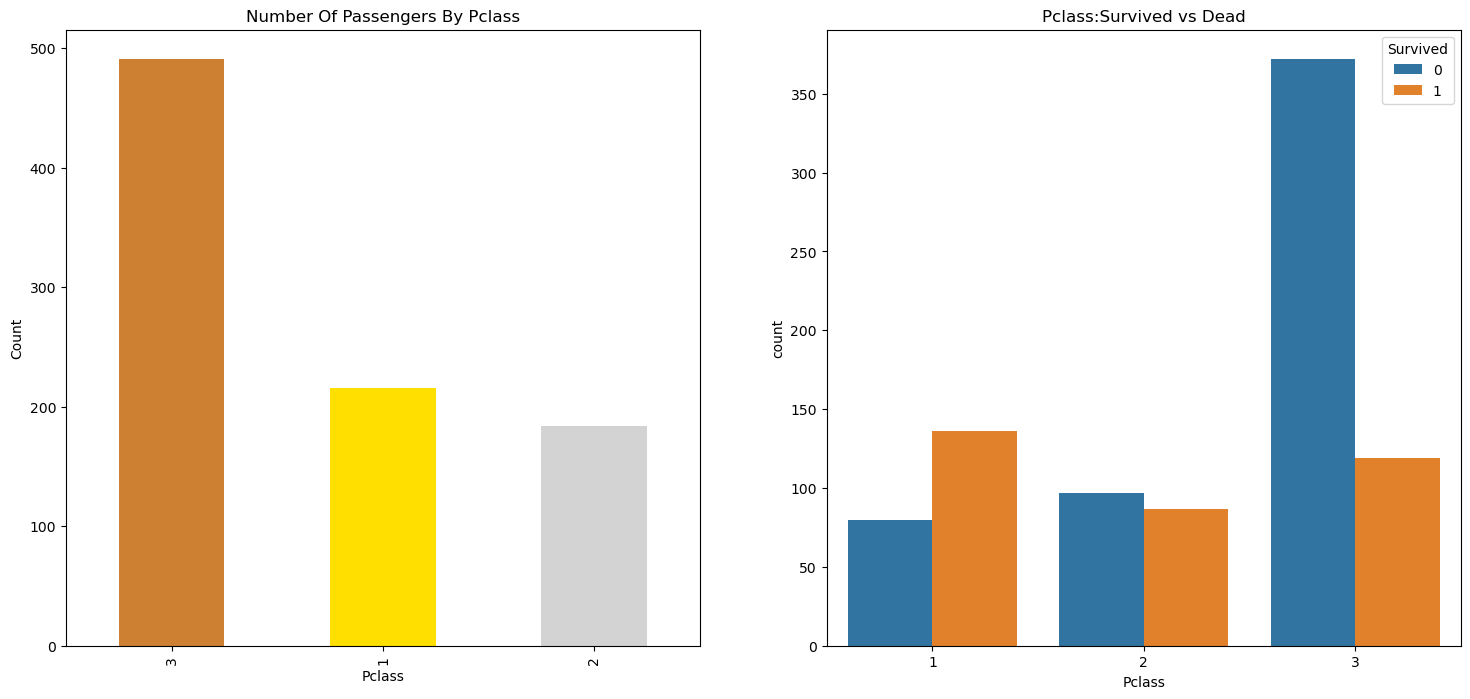

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

People say **Money Can't Buy Everything**. But we can clearly see that Passenegers Of Pclass 1 were given a very high priority while rescue. Even though the the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around **25%**.

For Pclass 1 %survived is around **63%** while for Pclass2 is around **48%**. So money and status matters. Such a materialistic world.

Lets Dive in little bit more and check for other interesting observations. Lets check survival rate with **Sex and Pclass** Together.

## Age--> Continous Feature

In [ ]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.841941638608304 Years


In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="Pclass",y="Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex",y="Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

> **Observations**:

>The number of children increases with Pclass and the survival rate for passenegers below Age 10(i.e children) looks to be good irrespective of the Pclass.

>Survival chances for Passenegers aged 20-50 from Pclass1 is high and is even better for Women.

>For males, the survival chances decreases with an increase in age.

As we had seen earlier, the Age feature has **177** null values. To replace these NaN values, we can assign them the mean age of the dataset.

But the problem is, there were many people with many different ages. We just cant assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie??

**Bingo!!!!**, we can check the **Name**  feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups.

**''What's In A Name??''**---> **Feature**  :p

In [ ]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [ ]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

In [ ]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady',
                         'Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other',
                         'Other','Other','Mr','Mr','Mr'],inplace=True)

In [ ]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

### Filling Missing - Ages

In [ ]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [ ]:
data.Age.isnull().any() #So no null values left finally 

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

> **Observations**:

> The Toddlers(age<5) were saved in large numbers(The Women and Child First Policy).

> The oldest Passenger was saved(80 years).

> Maximum number of deaths were in the age group of 30-40.

In [ ]:
sns.catplot(x='Pclass',y='Survived',col='Initial',data=data,kind='bar')
plt.show()

The Women and Child first policy thus holds true irrespective of the class.

## Embarked--> Categorical Value

In [ ]:
pd.crosstab([data.Embarked,data.Pclass],
            [data.Sex,data.Survived],
            margins=True).style.background_gradient(cmap='summer_r')

### Chances for Survival by Port Of Embarkation

In [ ]:
# sns.factorplot(x=data['Embarked'],y=data['Survived'])
sns.catplot(x="Embarked", y="Survived", data=data,kind='bar')
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

The chances for survival for Port C is highest around 0.55 while it is lowest for S.

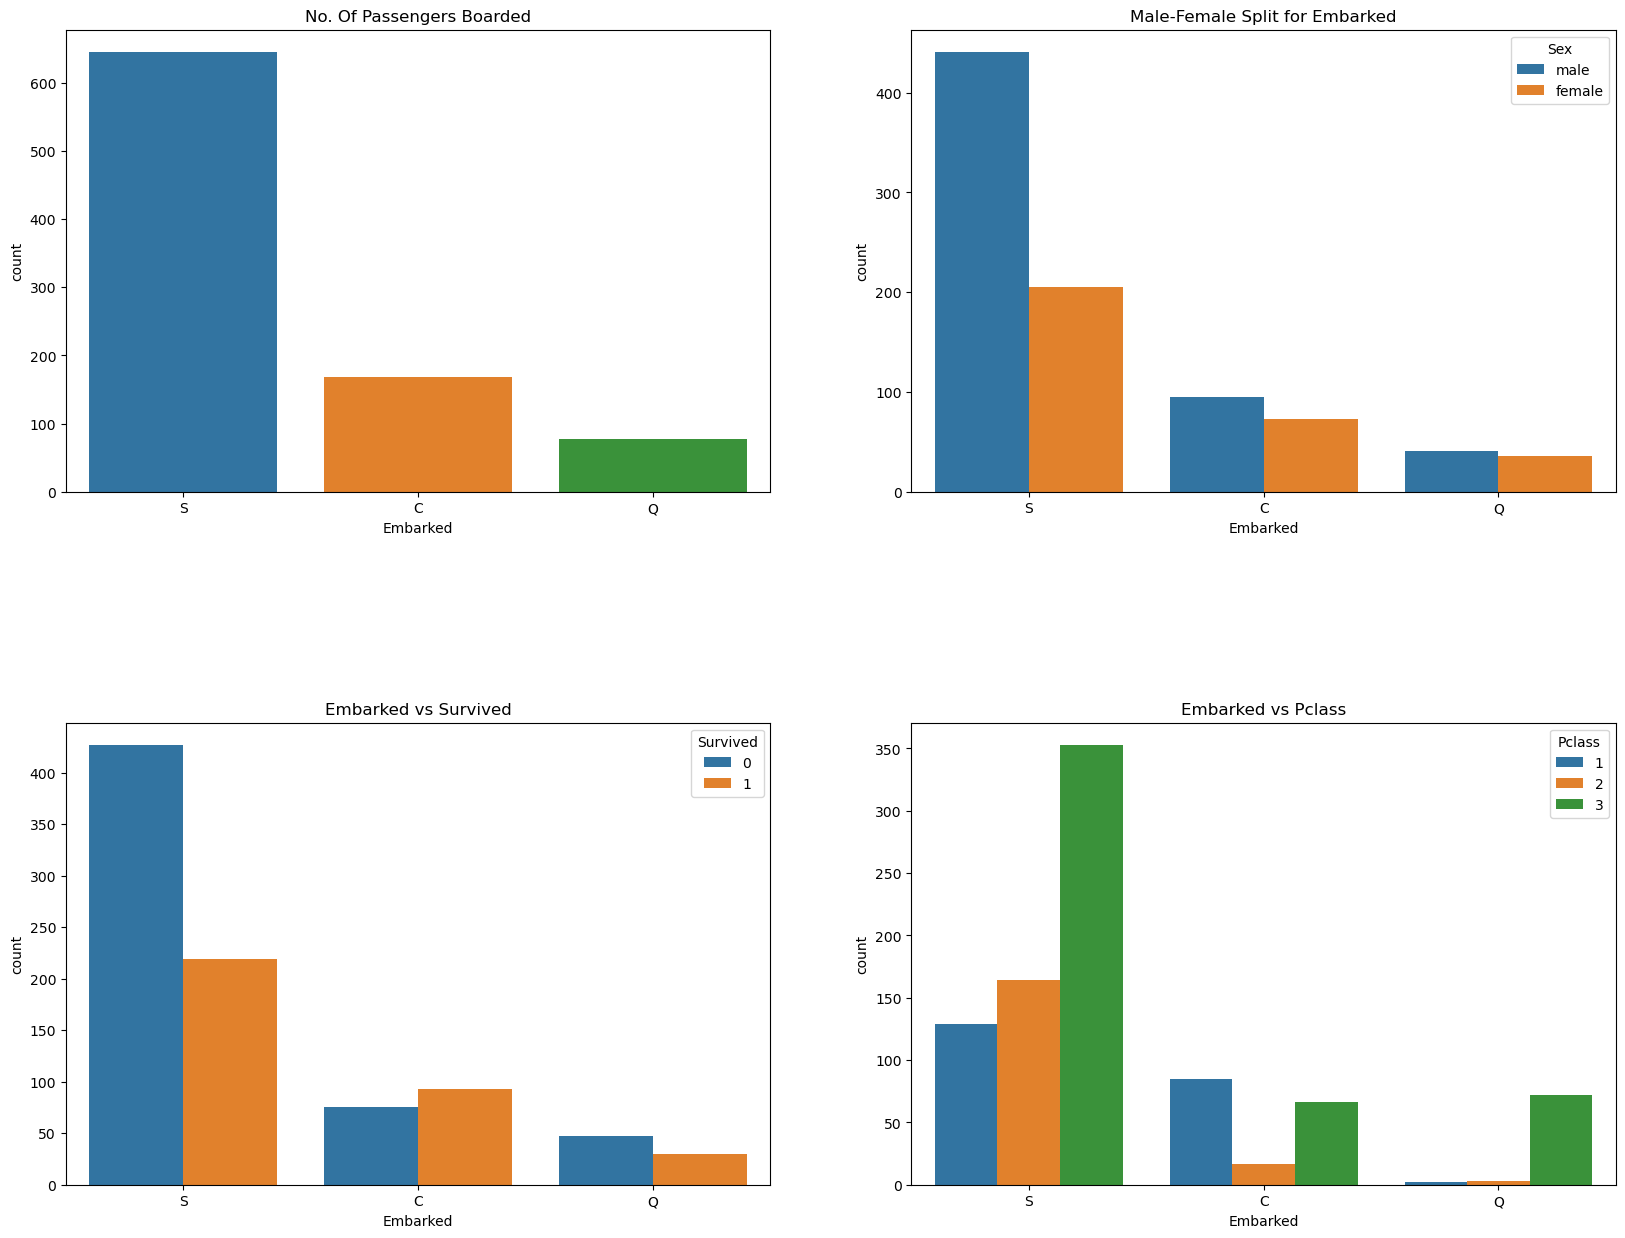

In [ ]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(x=data['Embarked'],ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(x=data['Embarked'],hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x=data['Embarked'],hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x=data['Embarked'],hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

> **Observations**:

> Maximum passenegers boarded from S. Majority of them being from Pclass3.

>The Passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all the Pclass1 and Pclass2 Passengers.

>The Embark S looks to the port from where majority of the rich people boarded. Still the chances for survival is low here, that is because many passengers from Pclass3 around **81%** didn't survive. 

>Port Q had almost 95% of the passengers were from Pclass3.

In [ ]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',col='Embarked',data=data,kind='bar')
plt.show()

> **Observations**:

> The survival chances are almost 1 for women for Pclass1 and Pclass2 irrespective of the Pclass.

> Port S looks to be very unlucky for Pclass3 Passenegers as the survival rate for both men and women is very low.**(Money Matters)**

> Port Q looks looks to be unlukiest for Men, as almost all were from Pclass 3.


### Filling Missing Embarked 

As we saw that maximum passengers boarded from Port S, we replace NaN with S.

In [ ]:
data['Embarked'].fillna('S',inplace=True)
data.Embarked.isnull().any()# Finally No NaN values

## Observations in a Nutshell for all features:
**Sex:** The chance of survival for women is high as compared to men.

**Pclass:**There is a visible trend that being a **1st class passenger** gives you better chances of survival. The survival rate for **Pclass3 is very low**. For **women**, the chance of survival from **Pclass1** is almost 1 and is high too for those from **Pclass2**.   **Money Wins!!!**. 

**Age:** Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

**Embarked:** This is a very interesting feature. **The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S.** Passengers at Q were all from **Pclass3**. 


In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()